In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\sapna\OneDrive\Desktop\movies.exl.csv",encoding='latin-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# EDA  AND  DATA CLEANING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
data.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [6]:
data.shape

(15509, 10)

In [7]:
data['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [8]:
data['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [9]:
data['Actor 1'].value_counts()

Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: count, Length: 4718, dtype: int64

In [10]:
data['Actor 2'].value_counts()

Actor 2
Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Paris Keswani          1
Shubhangi Latkar       1
Amit Ghosh             1
Ayushi Singh           1
Sarah Jane Dias        1
Name: count, Length: 4891, dtype: int64

In [11]:
data['Actor 3'].value_counts()

Actor 3
Pran             91
Shakti Kapoor    65
Anupam Kher      64
Jeevan           59
Prem Chopra      52
                 ..
Kayamali          1
Kirit Shah        1
Sanil Khosla      1
Anup Grover       1
Suparna Anand     1
Name: count, Length: 4820, dtype: int64

In [12]:
data.duplicated().sum()

6

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [15]:
data.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True)
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [16]:
print(f"Average rating of movies ={ data['Rating'].head(10).mean()}")

Average rating of movies =5.74


In [17]:
data. groupby('Votes')['Rating'].sum().sort_values(ascending =False)

Votes
10        505.6
7         502.9
9         481.8
13        438.7
8         394.6
          ...  
6,655       1.7
8,186       1.7
774         1.6
3,899       1.4
67,785      1.1
Name: Rating, Length: 2027, dtype: float64

In [18]:
data.describe(include="object")

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659,5659,5659,5659
unique,5385,91,174,376,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,90,41,104,52,57


In [19]:
list=data[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("list based on rating")
list

list based on rating


,Name,Genre,Rating
8339,Love Qubool Hai,"Drama, Romance",10.0
5410,Half Songs,"Music, Romance",9.7
6852,June,Drama,9.4
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,"History, Romance",9.4
1314,Ashok Vatika,Drama,9.3
13231,Sindhustan,"Documentary, Family, History",9.3
8344,Love Sorries,"Comedy, Drama, Romance",9.3
12673,Secrets of Sinauli,"Documentary, History",9.3
11843,Refl3ct,Sci-Fi,9.3


In [20]:
data['Year']=data['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [21]:
data['Duration']=pd.to_numeric(data['Duration'].str.replace('min',''))

In [22]:
data['Genre']=data['Genre'].str.split(',')
data=data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0],inplace=True)

In [23]:
data['Votes']=pd.to_numeric(data['Votes'].str.replace(',',''))

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int32  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 982.7+ KB


# DATA VISUALIZATION

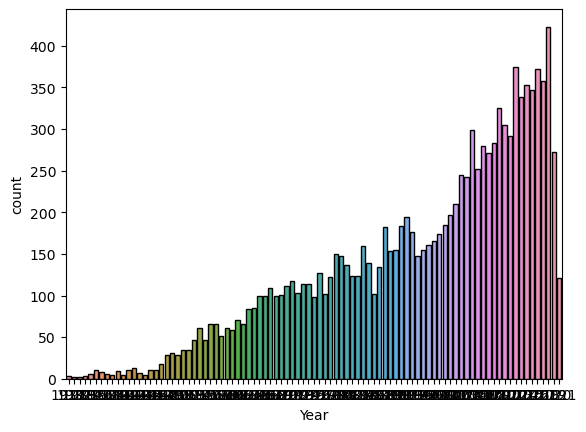

In [25]:
sns.countplot(x='Year',edgecolor ='black',data=data)

plt.show()

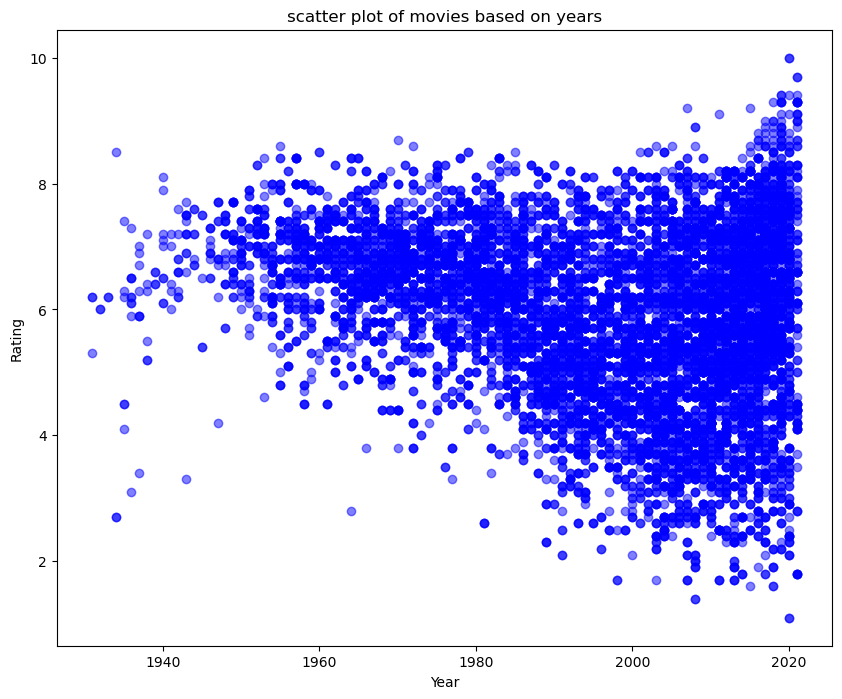

In [26]:
years=data['Year']
ratings=data['Rating']
plt.figure(figsize=(10,8))
plt.scatter(years,ratings,alpha=0.5,color='blue')
plt.title('scatter plot of movies based on years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

# DATA MODELING

In [27]:
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , mean_absolute_error ,mean_squared_error, r2_score

In [28]:
data.drop('Name',axis=1,inplace=True)

In [29]:
genre_mean_rating= data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating']=genre_mean_rating

director_mean_rating= data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded']=director_mean_rating

actor1_mean_rating= data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded']=actor1_mean_rating

actor2_mean_rating= data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded']=actor2_mean_rating

actor3_mean_rating= data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded']=actor3_mean_rating





In [30]:
X=data[['Year','Votes','Duration','Genre_mean_rating','Director_encoded','Actor1_encoded','Actor2_encoded','Actor3_encoded']]
y=data['Rating']

In [31]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)
model_pred= model.predict(X_test)

In [33]:
print('the performance evaluation of lodistic regression is below:','\n')
print('Mean squared error:',mean_squared_error(y_test,model_pred))
print('Mean absolute error:',mean_absolute_error(y_test,model_pred))
print('R2 score:',r2_score(y_test,model_pred))

the performance evaluation of lodistic regression is below: 

Mean squared error: 0.44639778808861136
Mean absolute error: 0.4921055068501124
R2 score: 0.7641906900948996


In [34]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.248697,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.838423,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.838739,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.838423,5.335135,4.793617,5.73,5.93
5,1997,827,147,5.875793,5.335135,4.793617,5.73,5.93


In [35]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [36]:
TEST={'Year':[2019],'Votes':[8],'Duration':[109],'Genre_mean_rating':[6.248697],'Director_encoded':[7.000000],'Actor1_encoded':[6.850000],'Actor2_encoded':[7.00],'Actor3_encoded':[7.00]}
trail=pd.DataFrame(TEST)

In [37]:
rating_predicted= model.predict(trail)
print("Predicted Rating:",rating_predicted[0])

Predicted Rating: 7.243440525071661


In [38]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
RF_pred=RF.predict(X_test)


In [39]:
print('the performance evaluation of Randomforestregressor is below:','\n')
print('Mean squared error:',mean_squared_error(y_test,RF_pred))
print('Mean absolute error:',mean_absolute_error(y_test,RF_pred))
print('R2 score:',r2_score(y_test,RF_pred))

the performance evaluation of Randomforestregressor is below: 

Mean squared error: 0.09166729465776291
Mean absolute error: 0.17503839732888168
R2 score: 0.9515768176480666


# VISUALIZATION OF TEST MODELS

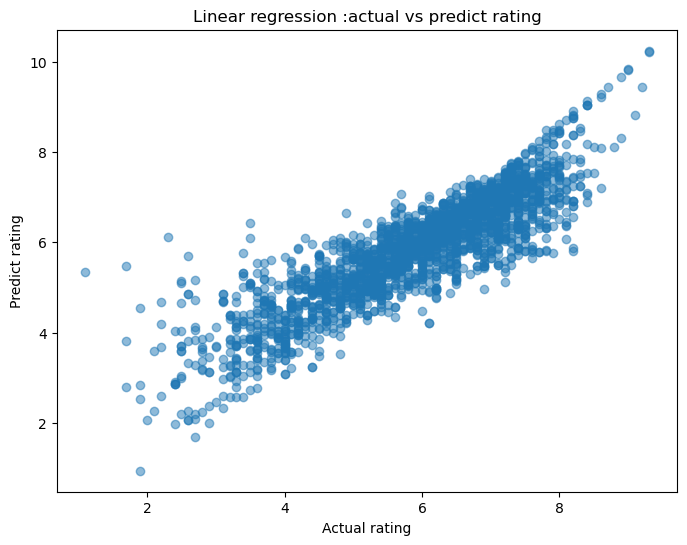

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,model_pred,alpha=0.5)
plt.title('Linear regression :actual vs predict rating')
plt.xlabel('Actual rating')
plt.ylabel('Predict rating')
plt.show()

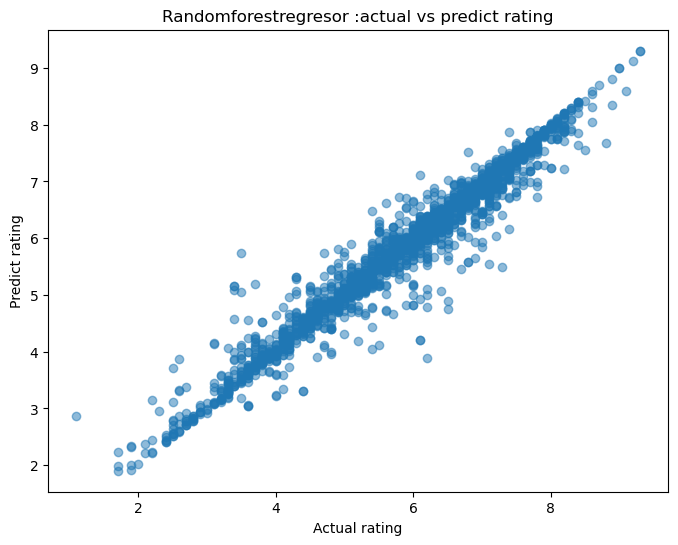

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,RF_pred,alpha=0.5)
plt.title('Randomforestregresor :actual vs predict rating')
plt.xlabel('Actual rating')
plt.ylabel('Predict rating')
plt.show()